In [40]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

CAMERA SETUP

In [41]:
# holistics

mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #utilities for drawing 

In [42]:
#setting up the functions

#this is to make the color conversion
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #conversion for color
    image.flags.writeable = False #IF IMAGE IS 
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #conversion for color
    return image, results
    

LANDMARK FUNCTION

In [43]:
#cv2.cvtColor??
#FOR TRIAL

#the landmark function
#def draw_landmarks(image, results):
 #   mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
  #  mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
   # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [44]:
#New landmark with design
def draw_style_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1), #Dot Color
                            mp_drawing.DrawingSpec(color = (80, 250, 121), thickness = 1, circle_radius = 1) #Line Color
                            ) # Draw face connections
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1), #Dot Color
                            mp_drawing.DrawingSpec(color = (80, 250, 121), thickness = 1, circle_radius = 1)) # Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1), #Dot Color
                            mp_drawing.DrawingSpec(color = (80, 250, 121), thickness = 1, circle_radius = 1)) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1), #Dot Color
                            mp_drawing.DrawingSpec(color = (80, 250, 121), thickness = 1, circle_radius = 1)) # Draw right hand connections

In [45]:
#mp_holistic.POSE_CONNECTIONS

In [46]:
#mp_drawing.draw_landmarks??

In [47]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        #THE FEED OF THE CAMERA
        ret, frame =  cap.read()

        #to make detections
        image, results = mediapipe_detection(frame, holistic)



        #drawing the landmarks
        draw_style_landmarks(image, results)



        # show to screen
        cv2.imshow('Open CV FEED', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Checking Landmarks
face landmark is the landmark for the face
hand landmark is the landmark for the joints(hands)

face and hand should be in the frame of the camera to take the landmarks

SCROLL UP TO 2ND CELL

In [48]:
len(results.face_landmarks.landmark)

468

In [49]:
len(results.left_hand_landmarks.landmark)

21

In [50]:
results

mediapipe.python.solution_base.SolutionOutputs

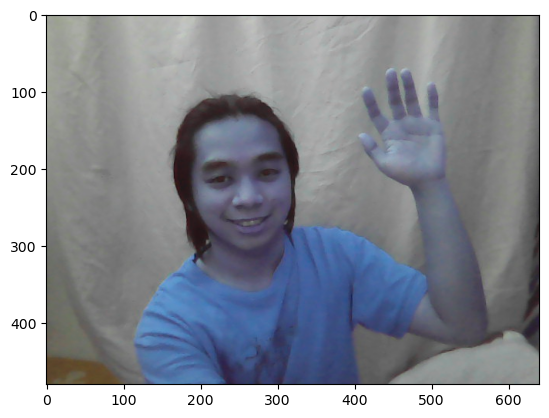

In [51]:
plt.imshow(frame) #just to show

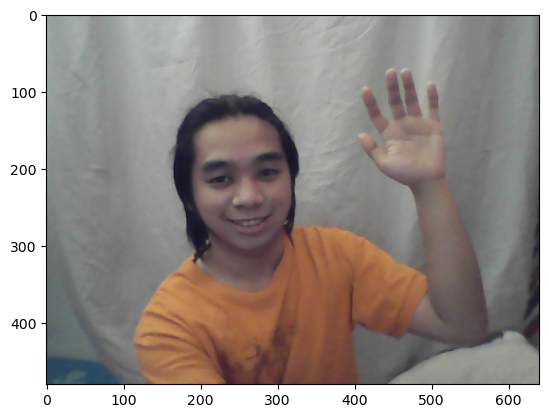

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) #original color

In [53]:
draw_style_landmarks(frame, results)

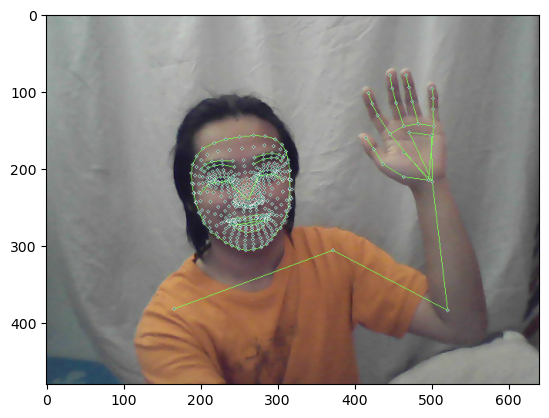

In [54]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# EXTRACTING KEYPOINT VALUES

In [55]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

CHECKING THE NUMBERS:

In [56]:
len(results.pose_landmarks.landmark)*4

132

In [57]:
len(results.left_hand_landmarks.landmark)

21

In [58]:
len(results.face_landmarks.landmark)*3

1404

LH stands for LEFT HAND
RH stands for RIGHT HAND

In [59]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [60]:
pose.shape

(132,)

In [61]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
lh

array([ 7.75284708e-01,  4.49657977e-01,  2.12036184e-07,  7.25115776e-01,
        4.41111147e-01, -1.16169155e-02,  6.84297264e-01,  4.05767620e-01,
       -1.49000166e-02,  6.65114760e-01,  3.64661574e-01, -1.78814717e-02,
        6.49020553e-01,  3.34883422e-01, -2.08294410e-02,  6.98280752e-01,
        3.23292792e-01, -2.31786189e-03,  6.73407495e-01,  2.74976790e-01,
       -1.18480306e-02,  6.61424637e-01,  2.43682399e-01, -2.11981665e-02,
        6.53852284e-01,  2.13486344e-01, -2.86807697e-02,  7.25997210e-01,
        3.02146673e-01, -6.32143673e-03,  7.09777534e-01,  2.39655167e-01,
       -1.29749570e-02,  7.02643096e-01,  2.00767696e-01, -2.13998836e-02,
        6.97870076e-01,  1.65686533e-01, -2.82725338e-02,  7.55083025e-01,
        2.96551526e-01, -1.30644348e-02,  7.42819726e-01,  2.37012833e-01,
       -2.27471516e-02,  7.36439466e-01,  1.99466094e-01, -2.99034975e-02,
        7.30593383e-01,  1.64841086e-01, -3.54690254e-02,  7.86475897e-01,
        3.03169638e-01, -

In [63]:
np.zeros(21*3).shape

(63,)

In [64]:
#MAKING THE FUNCTION
def extract_keypoints(results):
    #copy paste the previous cell and then change face n pose value for consistency
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    h = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [65]:
result_test = extract_keypoints(results)

In [66]:
result_test

array([ 0.41027397,  0.5058977 , -0.73332578, ...,  0.        ,
        0.        ,  0.        ])

In [67]:
468*3+33*4+21*3+21*3  #checking if the same all flatten value "1662"

1662

In [68]:
np.save('0', result_test)

In [69]:
np.load('0.npy')

array([ 0.41027397,  0.5058977 , -0.73332578, ...,  0.        ,
        0.        ,  0.        ])

# SETTING UP THE FOLDER FOR ARRAY AND DATA COLLECTION

In [70]:
#path for the data and array
DATA_PATH = os.path.join('Data')

#the actions detected
actions = np.array(['wave', 'thumbsup', 'ok'])

# 30 videos worth of data
no_sequences = 30
# length (30 frames)
sequence_length = 30

In [71]:
for action in actions:
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# TRAINING AND COLLECTING DATA

In [72]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    #NEW LOOP
    for action in actions:
        #loop throught swequence aka videos
        for sequence in range(no_sequences):
            #loop throught video legnth aka sequence length
            for frame_num in range(sequence_length):

                #THE FEED OF THE CAMERA
                ret, frame =  cap.read()

                #to make detections
                image, results = mediapipe_detection(frame, holistic)

                #drawing the landmarks
                draw_style_landmarks(image, results)

                #NEW wait logic
                if frame_num == 0:
                    cv2.putText(image, "STARTING COLLECTION", (120, 200),
                                cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collectin frames for {} Video Number {}".format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)

                else:
                    cv2.putText(image, "Collectin frames for {} Video Number {}".format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # show to screen
                cv2.imshow('Open CV FEED', image)

                #break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

# PRE PROCESSING DATA AND CREATING LABELS

In [73]:
#importing sklearn and tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [74]:
label_map = {label:num for num, label in enumerate(actions)}

In [75]:
label_map

{'hello': 0, 'iloveyou': 1, 'ok': 2}

In [76]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [77]:
np.array(sequences).shape

(90, 30, 1662)

In [78]:
np.array(labels).shape

(90,)

In [79]:
X = np.array(sequences)

In [80]:
X.shape

(90, 30, 1662)

In [81]:
y = to_categorical(labels).astype(int)

In [82]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [84]:

y_test.shape

(5, 3)

# BUILDING AND TRAIN USING LSTM NEURAL NETWORK

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [115]:
log_dir = os.path.join('Logs') #creating log directory
tb_callback = TensorBoard(log_dir=log_dir)

In [116]:
#the layers
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) #false because the next layer is dense layer
model.add(Dense(64, activation='relu')) #64 units
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) #actions layer || softmax would give the array that add up to one; highest value or higher probability
#64 Units
#relu for

In [117]:
res = [.7, 0.2, 0.1]

In [118]:
actions[np.argmax(res)]

'hello'

In [119]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
#I use this 'categorical_crossentropy' because its a multiclass classification model

In [120]:
#prediction
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 76ms/step - loss: 1.1990 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1495 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1936 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.5408 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1033 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0977 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0988 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0973 - categorical_accuracy: 0.2706
Epoch 9/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1011 - categorical_accuracy: 0.3294
E

In [121]:
#checking summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# MAKING PREDICTION

In [122]:
res = model.predict(X_test)

1/1 [==============================] - 1s 641ms/step


In [123]:
actions[np.argmax(res[1])]

'iloveyou'

In [124]:
actions[np.argmax(y_test[1])]

'ok'

# SAVING WEIGHTS

In [125]:
model.save('action.h5')

d:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [126]:
#del model

In [127]:
#model.load_weights('action.h5')

# EVALUATION

In [128]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [129]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 26ms/step


In [130]:

ytrue = np.argmax(y_train, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [131]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [29,  0]],

       [[ 0, 56],
        [ 0, 29]],

       [[58,  0],
        [27,  0]]], dtype=int64)

In [132]:
accuracy_score(ytrue, yhat)

0.3411764705882353

# TESTING

In [133]:
#quick color function written at last
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num*40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

In [134]:
sequence = []
sentence = []
threshold = 0.2

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_style_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
#         sequence = sequence[:30]
#        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

#detection variable
sequence = []
sentence = []
threshold = 0.3


cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        #THE FEED OF THE CAMERA
        ret, frame =  cap.read()

        #to make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)


        #drawing the landmarks
        draw_style_landmarks(image, results)

        #predict logic
        keypoints = extract_keypoints(results) #using the function made from the very top
        #sequence.insert(0, keypoints) #using insert instead of append(append only detects 1 for uknown reason)
        sequence.append(keypoints)
        sequence = sequence[:-30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis = 0))[0]
            print(actions[np.argmax(res)])


        #visualization
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(action[np.argmax(res)])
                else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5:
                    sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)


        # show to screen
        cv2.imshow('Open CV FEED', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [135]:
np.expand_dims(X_test[0], axis = 0)

array([[[ 0.39382005,  0.47450206, -0.73488945, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43488732,  0.46189731, -0.69867694, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44534087,  0.45511669, -0.64750713, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.44046277,  0.44798106, -0.74886638, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44000769,  0.448129  , -0.68726021, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43974274,  0.44813749, -0.62742686, ...,  0.        ,
          0.        ,  0.        ]]])

In [136]:
(1, 30, 1662)

(1, 30, 1662)

In [137]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 30ms/step


array([[0.3420813 , 0.34269664, 0.31522205]], dtype=float32)